# Hierarchical clustering

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [143]:
class HierarchicalClustering:
    
    def __init__(self, n_cluster, metric):
        self.k = n_cluster
        self.metric = metric
        self.distance = None
        
    def fit(self, X):
        X = X[:, np.newaxis, :].tolist()
        while len(X) > self.k:
            X = self.update(X)
        points, labels = [], []
        for cluster_label, cluster in enumerate(X):
            for point in cluster:
                points.append(point)
                labels.append(cluster_label)
        return np.array(points), np.array(labels)
        
    def update(self, X):
        min_dist = float("inf")
        min_i, min_j = None, None
        for i in range(len(X)):
            for j in range(i+1, len(X)):
                distance = self.metric(X[i], X[j])
                if distance < min_dist:
                    min_dist = distance
                    min_i, min_j = i, j
        X[min_i].extend(X[min_j].copy())
        X.pop(min_j)
        return X

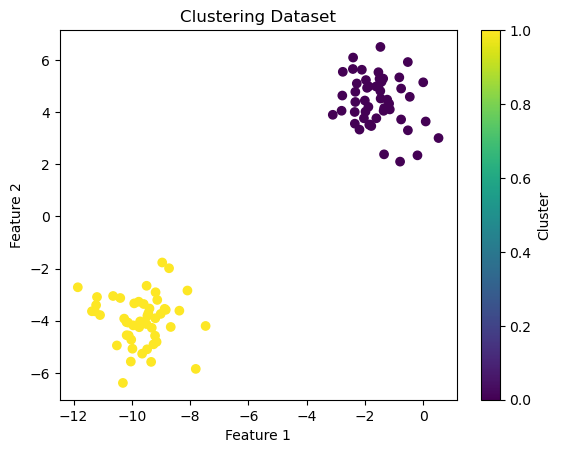

In [144]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1, random_state=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Dataset')
plt.colorbar(label='Cluster')
plt.show()

In [145]:
def single_linkage(A, B):
    minDist = float("inf")
    for a in A:
        for b in B:
            a, b = np.array(a), np.array(b)
            distance = np.linalg.norm(a-b)
            minDist = min(distance, minDist)
    return minDist

In [146]:
cluster = HierarchicalClustering(2, single_linkage)

In [147]:
_X, _y = cluster.fit(X)

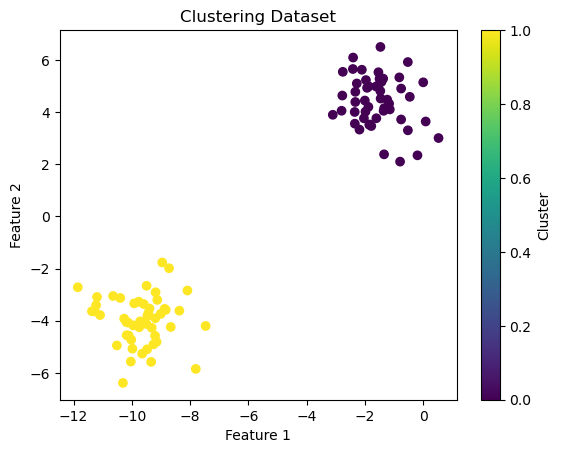

In [148]:
plt.scatter(_X[:, 0], _X[:, 1], c=_y, cmap='viridis', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Dataset')
plt.colorbar(label='Cluster')
plt.show()